In [678]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize



#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex4\ex4\ex4data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [679]:
#Taking matrix X and Y
X = mat_contents['X']
print(X)

Y = mat_contents['y']
print(Y)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [680]:
#initialising some values...

#m: no. of data sets
#n: no. of features
m,n = X.shape
print(m,n)

#taking the width
example_width = round(n**0.5)

print(example_width)

print()

5000 400
20



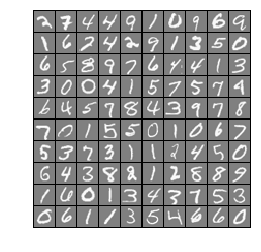

AxesImage(112.68,36;217.44x217.44)
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 ...
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [681]:
#VISUALIZING THE DATA

#taking random permutation of the data set
random = np.random.permutation(m)

#now taking the random 100 data sets
sel = X[random[0:100],:]


#displaying the data
def displayData(X,example_width):
    plt.close()
    plt.figure()
    plt.set_cmap('gray')#setting the color to gray
    
    m,n = X.shape
    
    #taking the height
    example_height = int(n/example_width)
    
    #no. of rows and columns
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols =int(math.ceil(m/display_rows))
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (example_height + pad),pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    
    for i in range(1,display_rows+1):
        for j in range(1,display_cols+1):
            if curr_ex > m:
                break
            
            max_val = max(abs(X[curr_ex-1,:]))
            
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
            
            display_array[rows[0]:rows[-1]+1,cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :],(example_height, example_width),order = 'F') / max_val
            curr_ex += 1
        
        if curr_ex > m:
            break
    
    h = plt.imshow(display_array,vmin = -1,vmax = 1)
    
    plt.axis('off')
    plt.show(block = False)
    
    return h,display_array

a,b = displayData(sel,int(example_width))
print(a)
print(b)


In [682]:
#MODEL REPRESENTATION...

In [683]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)
    
Lambda = 1

In [684]:
#Taking matrix X
X = mat_contents['X']

m,n = X.shape
x0 = [1 for i in range(m)]
                                                                #yha hmne dubara X and Y bna dia becoz we have to add column of 1
X = np.concatenate((np.array(x0).reshape(m,1),X),axis = 1)
print(X.shape)


(5000, 401)


In [685]:
all_theta = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex4\ex4\ex4weights.mat')
theta1 = all_theta['Theta1']
m1,n1 = theta1.shape

theta2 = all_theta['Theta2']
m2,n2 = theta2.shape

theta1ravel = theta1.ravel().reshape(m1*n1,1)
theta2ravel = theta2.ravel().reshape(m2*n2,1)


nn_params = np.concatenate((theta1ravel,theta2ravel),axis = 0)

print(nn_params.shape)

print(theta1.shape)
print(theta2.shape)

(10285, 1)
(25, 401)
(10, 26)


In [686]:
#FEEDFORWARD AND COST FUNCTION...

In [687]:
def sigmoid(z):
    
    #IF z IA AN ARRAY
    if isinstance(z,np.ndarray):
        temp = np.ones(z.shape)
       
        temp = 1/(1 + np.exp(-z))
        
        return temp
   
    #IF z IS A LIST
    elif isinstance(z,list):
        for i in range(len(z)):
            z[i] = 1/(1 + np.exp(-z[i]))
        return z
    
    #IF z IS A NO.   
    else:
        return 1/(1 + np.exp(-z))

In [688]:
print(nn_params.shape)

(10285, 1)


In [689]:
#Computing h(theta)
a = sigmoid(X.dot(theta1.transpose()))#hidden layer
print(a.shape)
a0 = np.ones((m,1))#hidden layer me 1 column add kia of ones
    
a = np.concatenate((a0,a),axis = 1)
    
hypo = sigmoid(a.dot(theta2.transpose()))

print(hypo.shape)

(5000, 25)
(5000, 10)


In [690]:
#creating Y again
Ynew = np.zeros((m,num_labels))

for i in range(m):
       
    Ynew[i,Y[i]-1] = 1
    
print(Ynew.shape)
import random
for i in range(10):
    c = random.randint(1,5000)
    
    print(Ynew[c],'  ',Y[c])

(5000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]    [8]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]    [9]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    [1]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    [1]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    [1]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]    [4]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]    [3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]    [4]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    [1]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]    [5]


In [691]:
#Computing Cost(Feedforward)

# in these three lines, we bring last column of hypo to the first position
"""ss = hypo[:,0:9].reshape(5000,9)
aa = hypo[:,9].reshape(5000,1)

hypo = np.concatenate((aa,ss),axis = 1)"""


def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,Y,Lambda):
    
    

    #computing element wise multiplication of Ynew and log(hypo)
    term1 =np.multiply(Ynew,np.log(hypo))#np.multiply does element wise multiplication of the two matrices
    
    #computing element wise multiplication of (1 - Ynew) and log(1 - hypo)
    term2 = np.multiply(1-Ynew,np.log(1-hypo)) 
    
    #computing triple summation of (theta(ji) of all level)^2 multiplied by lambda/2m
    
    theta1temp = theta1[:,1:n1]
    theta2temp = theta2[:,1:n2]
    
    term3 = (Lambda/(2*m))*((theta1temp**2).sum() + (theta2temp**2).sum())
    
    return ((-(term1.sum() + term2.sum()))/m + term3)

print(nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,Y,Lambda))

0.3837698590909236


In [692]:

#computing derivatie of sigmoid(z) = g(z) * (1 - g(z))
def SigmoidGradient(z):
    return (sigmoid(z) * (1 - sigmoid(z)))

print(SigmoidGradient(np.arange(9).reshape(3,3)))

[[0.25       0.19661193 0.10499359]
 [0.04517666 0.01766271 0.00664806]
 [0.00246651 0.00091022 0.00033524]]


In [693]:
##RANDOM INITIALIZATION

In [694]:
epsilon_init = 0.12

#implementing a function to initialize the weights of the neural network
def randInitializeWeights(L_in, L_out):
    
    W = np.random.rand(L_out,L_in+1) * 2 * epsilon_init - epsilon_init
    
    return W



initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)


initial_nn_params = np.concatenate((initial_Theta1.reshape(initial_Theta1.size,order = 'F'),initial_Theta2.reshape(initial_Theta2.size,order = 'F')))


print(initial_nn_params.shape)
print(initial_Theta1.shape)
print(initial_Theta2.shape)

(10285,)
(25, 401)
(10, 26)


In [695]:
#def backpropagationAlgorithm(nn_params,input_layer_size,hidden_layer_size,num_labels,X,Ynew,Lambda):



a1 = X
    
a2 = sigmoid(X.dot(initial_Theta1.transpose()))#hidden layer

a2 = np.concatenate((np.ones((m,1)),a2),axis = 1)#on adding a column of 1

a3 = sigmoid(a.dot(initial_Theta2.transpose()))
    
delta3 = a3 - Y

initial_Theta2 = np.delete(initial_Theta2,0,1)
delta2 = (delta3.dot(initial_Theta2))*(SigmoidGradient(a1.dot(initial_Theta1.transpose())))
    

In [704]:
print((delta3.dot(initial_Theta2)))
print((SigmoidGradient(a1.dot(initial_Theta1.transpose()))).shape)

[[ 3.90659052 -0.46939872 -3.82460677 ... -1.87653956 -2.2859371
   1.18775021]
 [ 3.90327001 -0.47306908 -3.82116239 ... -1.87706572 -2.28283964
   1.18372821]
 [ 3.90913253 -0.47676668 -3.82005471 ... -1.88177278 -2.28740258
   1.18981296]
 ...
 [ 3.50928497 -0.42907515 -3.43228384 ... -1.69567427 -2.06204283
   1.06808996]
 [ 3.51526802 -0.43504048 -3.43766762 ... -1.6908825  -2.05804145
   1.06850403]
 [ 3.51410785 -0.42336136 -3.43426232 ... -1.69074511 -2.04941937
   1.06797702]]
(5000, 25)


In [697]:
print(initial_Theta1.shape)
print(initial_Theta2.shape)

print(a1.shape,a3.shape,a3.shape)

print(delta3.shape,delta2.shape)

(25, 401)
(10, 25)
(5000, 401) (5000, 10) (5000, 10)
(5000, 10) (5000, 25)


In [701]:
delta2


array([[ 0.96684812, -0.11662831, -0.92503962, ..., -0.45146118,
        -0.54250162,  0.2324413 ],
       [ 0.92041238, -0.11740217, -0.89634144, ..., -0.4519536 ,
        -0.55684441,  0.28217226],
       [ 0.97714025, -0.11506271, -0.85917518, ..., -0.448044  ,
        -0.56166124,  0.22544965],
       ...,
       [ 0.86148863, -0.09752859, -0.81556971, ..., -0.41622051,
        -0.47553744,  0.25967425],
       [ 0.83542542, -0.1075022 , -0.7729274 , ..., -0.42146499,
        -0.4527323 ,  0.21414811],
       [ 0.85892445, -0.09766129, -0.84058544, ..., -0.42099022,
        -0.50533273,  0.21495702]])